# Module Assessment

Import required packages for notebook

In [68]:
# Data Frames.
import pandas as pd

# Machine Learning Library that contains example datasets
import sklearn as skl

# for plots
import matplotlib.pyplot as plt
import numpy as np

# seaborn required to allow for overlapping of plots
import seaborn as sns

# Scientific computing for R²
import scipy as sp


## Assessment Tasks

1. Sourcing the data set
2. Exploring the data structure
3. Summarizing the data
4. Vizualise features
5. Investigate relationships (scatter plots)
6. Analyze relationship (regression line)
7. Analyse class distribution
8. Compute correlations
9. R squared
10. Pairplot

### Task 1: Sourcing the data set

Source of data set as provided:  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [69]:
# Load the iris data set using sklearn.datasets module
# Call the data 'iris'
iris = skl.datasets.load_iris()

In [70]:
# Look at the data
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Load_iris findings

While the sklearn load-iris function doesn't visually return anything, it does pull the iris data set from its library. For the purpose of this assessment, this data set will be called 'iris', but it is only through further code command ```iris``` that the array which has been imported in the background is now presented for visual review.

Upon review, it can be seen that the measurements are a 4 column array, each of which are based on 4 different measurement variables or feature_names as termed in the data set; sepal length, sepal width, petal length, and petal width. For each of these variables, there are 150 samples (50 in each of the three classes). In addition to this, it shows that there are 3 different flower species (target_names) being measured; setosa, versicolor, and virginica.

## Task 2: Exploring the Data Structure

The data displayed above shows the shape and various aspects of the dataset however, these can also be verified through the following commands.

In [71]:
# dataset shape
iris['data'].shape

(150, 4)

Shows the data set is a 150 row by 4 column array; 150 sample measurements for each of the 4 features measured.

In [72]:
# Target Names
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Confirms the different target names (species in the case of this data set), which make up the 150 samples

In [73]:
# Feature Names
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Verifies the 4 features that are measured on each sample.  


As documented [here](https://discuss.datasciencedojo.com/t/common-mistakes-which-occur-when-working-with-the-iris-dataset-in-python/1414) however, when importing the iris data through sklearn, it is not structured in a dataframe format. Dataframe is the preferred format when using pandas to allow easier analysis.

The below code used to convert the imported array into a dataframe, can be seen to specify only the data from the iris data set; ```iris.data```, the column headers under which the measurements were captured; ```iris.feature_names```.

As a means to make the data visually clearer, the target names column is also renamed to 'species'.

In [74]:
# convert the data into a DataFrame, titled 'iris_df'
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

# capture the targets names under a new title; species
iris_df['species'] = iris.target

With the above complete, the first 5 rows of the iris data set, converted into a dataframe can be presented.

In [75]:
# Show the first 5 rows of the new dataframe.
# Note: defaults to 5 rows when no number is specified within the brackets.
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Similar can be done to show the last 5 rows.

In [76]:
# Show the last 5 rows of the new dataframe.
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


While the above data is in a clear format, one noteable aspect is the species being listed as integers rather than the target names. In task 1, the data shows that the target names are compiled of 0's, 1's, and 2's, but for better clarity this can be changed to setosa, versicolor, and virginica respectively (code [source](https://stackoverflow.com/questions/43159754/datasets-load-iris-in-python)).

In [77]:
# convert the 'species' column to call out correct names rather than integers.
iris_df['species'] = iris_df['species'].replace(to_replace = [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])

This now allows to easily review different portions of the dataset

In [78]:
# show first 5 rows of the data
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [79]:
# show last 5 rows of the data
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### Output Review

As a result of converting the original array to a dataframe, the ```iris_df.head``` and ```iris_df.tail``` commands are able to clearly present the relevant rows. In the original array, the measurements, target and feature names were provided, but structured in a manner that wasn't visually clear. Now, it is instantly understandable for each sample, what feature name each measurement relates to, and also the species of said sample. While the first and last 5 rows are like this, below shows the same format is carried throughout.

In [80]:
# view middle rows 47 to 51
# method source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
iris_df.iloc[47:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


# Task 3: Summarizing the Data

To summarize the data, this can be done with a single command while still using the iris_df dataframe.

In [81]:
# show mean, minimum, maximum, standard deviation, and median for all 4 features
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


As can be seen above, for each feature, the mean, minimum measurement, maximum measurement, standard deviation, and median can be presented very easily. Before progressing onto plots, this infomration helps give some insight into the data. An example of such is that the sepal width measurements are relatively clustered, shown by the low standard deviation. Comapring this with the petal length, the difference in standard deviation is quite significant, indicating a larger variation in measurements. This can be shown in a clearer format below.

# Task 4: Visualize Features

Continuing from above, histograms can be used to discover if the species type can be determined solely by a given measurement. To do this, the iris_df dataframe and seaborn is used.

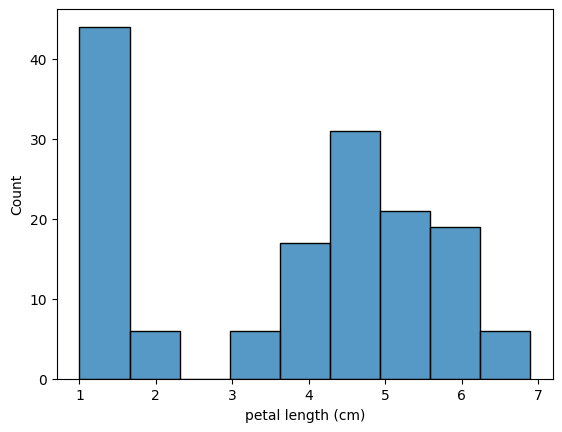

In [82]:
# create simple histogram for petal length using seaborn
sns.histplot(data=iris_df, x="petal length (cm)");

The above histogram doesn't offer any significant insights into the petal length. To improve the information displayed, an advantage of seaborn is that it allows several parameters to be specified in the code (parameter [source](https://seaborn.pydata.org/generated/seaborn.histplot.html)):
1. ```hue = 'species'``` will colour code the different columns for each each species.
2. ```binwidth=0.2``` sets the columns to a specific with. Reducing this figure makes the columns narrower, therefore increasing the quantity. Increasing the binwidth value does the opposite. 

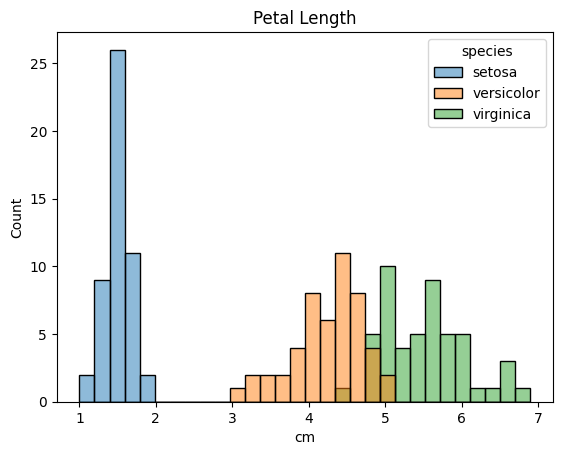

In [83]:
# create petal length histogram, applying 'hue' and 'binwidth' parameters.
sns.histplot(data=iris_df, x="petal length (cm)", hue = 'species', binwidth=0.2)

# add title
plt.title('Petal Length')

# add x-axis label
plt.xlabel('cm');


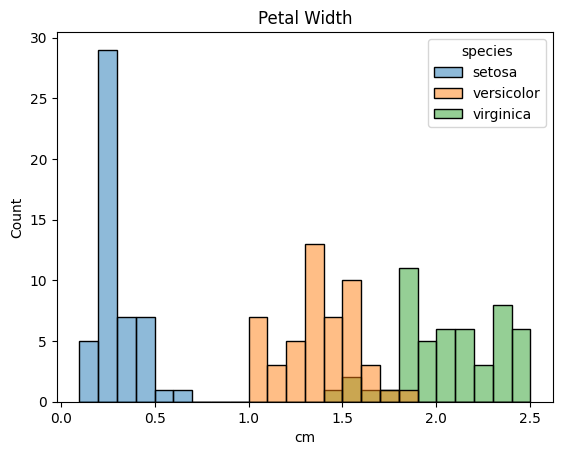

In [84]:
# repeat for petal width histogram but with different binwidth
sns.histplot(data=iris_df, x="petal width (cm)", hue = 'species', binwidth=0.1)
plt.title('Petal Width')
plt.xlabel('cm');

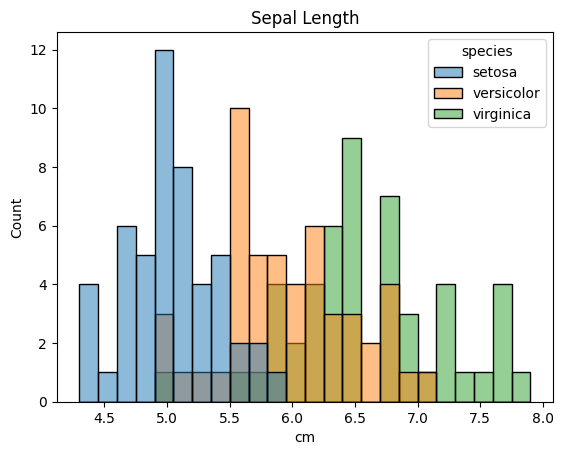

In [85]:
# repeat for sepal length histogram
sns.histplot(data=iris_df, x="sepal length (cm)", hue = 'species', binwidth=0.15)
plt.title('Sepal Length')
plt.xlabel('cm');

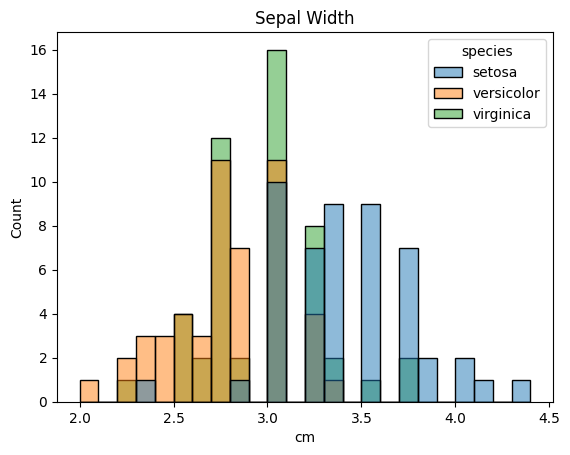

In [86]:
# repeat for sepal width histogram
sns.histplot(data=iris_df, x="sepal width (cm)", hue = 'species', binwidth=0.1)
plt.title('Sepal Width')
plt.xlabel('cm');

Per the above source, and as can be seen in the plotted histograms, the parameters can be adjusted greatly to help provide a plot which offers beneficial visual infomration. For each histogram, the binwidth was adjusted to help give a better plot based off the measurements.

# Task 5: Scatter Plot

The 2 features selected for analysis are sepal length and sepal width. 

To create the scatter plot, the measurements for each feature must be specified. As per below, it can be seen that column 0 is the sepal length, with column 1 being the sepal width.

In [87]:
# verification of column numbers
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Knowing the column numbers, the scatter plot can be created, applying sepal length (column 0) measurements on the x-axis, and sepal width (column 1) on the y-axis

To differentiate the three species, colours can also be applied against each target, by specifying such in the code.

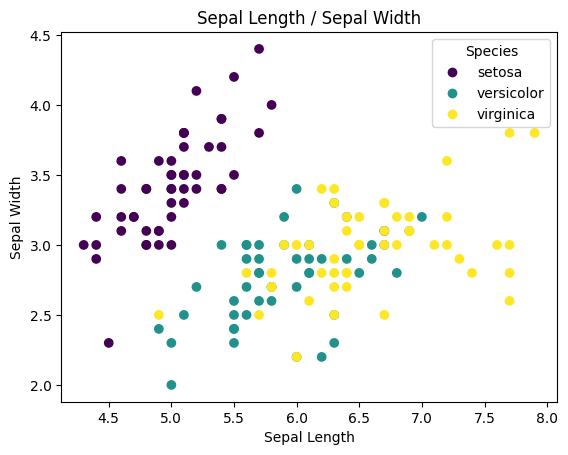

In [88]:
# Create a figure and an axis using pyplot
fig, ax = plt.subplots()

# Scatter plot creation specifying:
# x-axis (column 0 data),
# y-axis (column 1 data),
# and the plot colours related to the targets
scatter = ax.scatter(iris.data[:,0], iris.data[:,1], c = iris.target)

# Apply title and axes labels.
ax.set_title('Sepal Length / Sepal Width')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

# Add a legend
# To create a legend based off the different colour species,
# the code needs to specify target names (species in this case), which are to be referenced
# source: https://www.statology.org/matplotlib-scatterplot-legend/
ax.legend(scatter.legend_elements()[0], iris.target_names, title = 'Species');


As with the histogram, the above plot can be modifed using many parameters to adjust how it presents the information, but even in the above form, it can be seen that with the exception of a single outlier, the Setosa species are very clustered, following a trend of shorter sepal length with a larger width. A similar differentiation can not be applied to the Versicolor and Virginica species, as their plots are general mixed and overlapping. Such a plot helps relay this detail.

# Task 6: Analyze Relationship

Prior to analyzing the relationship through linear regression, in order to keep the formulas clearer, the x-axis measurements from above will be defined as 'x', and the y-axis as 'y'.

In [89]:
# x-axis values defined as 'x'
x = iris.data[:,0]

# y-axis values defined as 'y'
y = iris.data[:,1]

The previous scatter plot can now be recreated, using the same method as in task 5, but calling out 'x' and 'y for the relevant data to keep the code visually clearer.

A regression line will also be applied using [numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) however, to add a second legend for the regression line requires attention ([source](https://matplotlib.org/stable/users/explain/axes/legend_guide.html#multiple-legends-on-the-same-axes)). Firstly the scatter plot legend is titled 'first_legend', and then added to the plot accordingly ```ax.add_artist(first_legend)```.  

For the regression line legend, the line itself is given a label (y = mx + c), where the code calls the calculated 'm' and 'c' values. The legend for the line then specifies this label, and applied using ```ax.legend()```. The location is adjusted so it does not overlap with the plot legend.

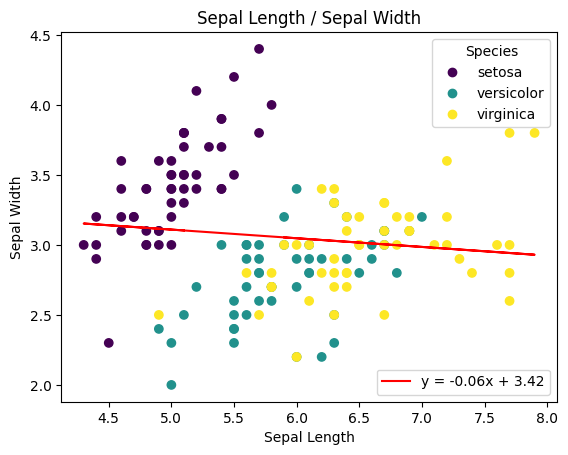

In [ ]:
# Create scatter plot using pyplot
fig, ax = plt.subplots()

# specify data for use
scatter = ax.scatter(x, y, c = iris.target)

# Setting plot title and axes labels.
ax.set_title('Sepal Length / Sepal Width')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

# Add first legend for plot
first_legend = ax.legend(scatter.legend_elements()[0], iris.target_names, title='Species')
ax.add_artist(first_legend)

# Using polyfit to fit a line to the data
m, c = np.polyfit(x, y, 1)

# Add regression line,
# labelled as the formula; y = mx + c
ax.plot(x, m * x + c, color="red", label = f'y = {m:.2f}x + {c:.2f}')

# Add second legend for regression line
ax.legend(loc = 'lower right')

# Show plot
plt.show()


From the above plot, it can be seen that given the significant variation of points accross the three different species, adding the regression does not offer an effective means to determine one sepal feature based off the other. The line itself is easily added to the plot using polyfit, from which the gradient (m) and y-intercept (c) can be determined. 

# Task 7: Analyze Class Distribution

Creating boxplots for the petal length of each of the 3 species using pyplot firstly requires separation of the necessary data.

In [91]:
# Separate the dataset to have solely petal length, and species
column = iris_df[['petal length (cm)' , 'species']]

# Then from said column, create a group with only the setosa measurements
setosa_grp = column.loc[iris_df['species'] == 'setosa']

# Then separate the petal length column
setosa_pet_lt = setosa_grp['petal length (cm)']

# Repeat above steps for the remaining 2 species
versicolor_grp = column.loc[iris_df['species'] == 'versicolor']
versicolor_pet_lt = versicolor_grp['petal length (cm)']
virginica_grp = column.loc[iris_df['species'] == 'virginica']
virginica_pet_lt = virginica_grp['petal length (cm)']

With the 3 groups created; 'setosa_pet_lt', 'versicolor_pet_lt', and 'virginica_pet_lt', a single plot for the 3 sets can be created.

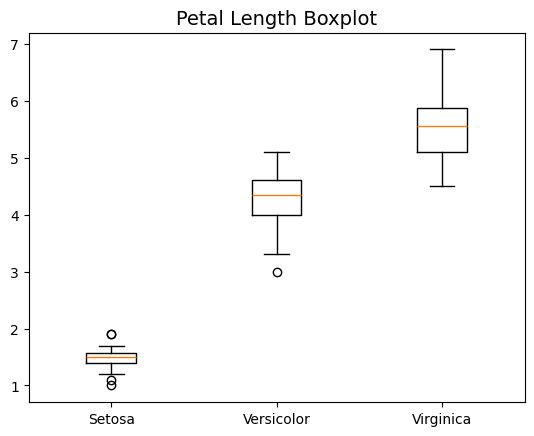

In [92]:
# Create figure, axis.
fig, ax = plt.subplots()

# Specify 3 groups for plotting
plot_data = ([setosa_pet_lt, versicolor_pet_lt, virginica_pet_lt])

# Set x-axis labels
# Source: https://matplotlib.org/stable/gallery/statistics/boxplot_color.html#sphx-glr-gallery-statistics-boxplot-color-py
labels = ['Setosa', 'Versicolor', 'Virginica']

# Add title.
ax.set_title('Petal Length Boxplot', fontsize = 14)

# Show boxplot
ax.boxplot(plot_data, tick_labels = labels);


The above is a very long method for what would be considered a regular task. A much more effective solution would be to use seaborn.

source: https://seaborn.pydata.org/generated/seaborn.boxplot.html

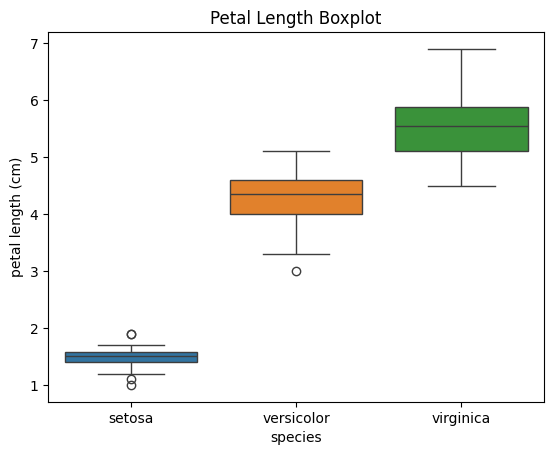

In [93]:
# Create boxplot from the dataframe iris_df
# Specify X as the species, and Y as the petal length.
# Add title source: https://www.statology.org/seaborn-title/
sns.boxplot (x = 'species', y = "petal length (cm)", data=iris_df, hue = 'species').set(title = 'Petal Length Boxplot')
plt.show;

# Task 8: Compute Correlations

Determining the correlation coefficients is easily done, once the columns of the dataframe are specified
Source: https://stackoverflow.com/questions/74538936/how-to-use-pandas-dataframe-corr-with-only-a-specific-number-of-columns

In [94]:
# Specify columns from dataframe and determing correlation coefficients
correl_coeff = iris_df.iloc[: , 0:4].corr() 

# Print coefficients
print(correl_coeff)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


The above code can be seen to generate a 4 by 4 matrix, in which the relationship between one feature and another are easily determined. Another way to display the same information is through a heatmap. This can be done using matplotlib, in which it creates a generic heatmap using the above 'correl_coeff' data. Much like the previous plots, the code can be expanded to specify certain criteria for chosen features as can be seen below:

 - Creation of heatmap, axes labels, and title:  
    https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

 - Specifying colormap using 'cmap =':  
    https://matplotlib.org/stable/gallery/color/colormap_reference.html

 - Add colorbap (legend):  
    https://stackoverflow.com/questions/32236046/add-a-legend-to-my-heatmap-plot

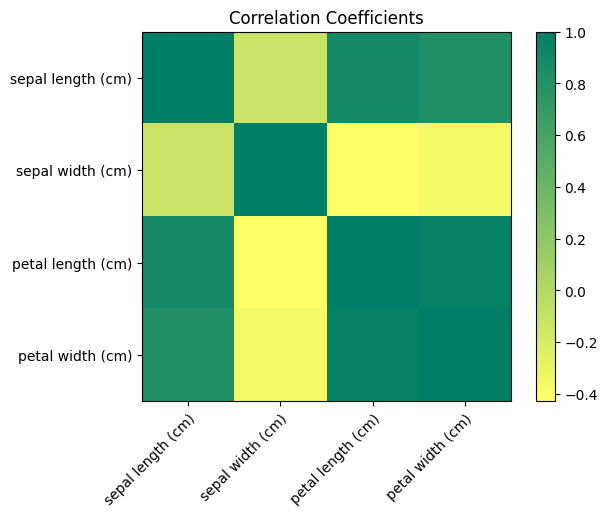

In [95]:
# Create heatmap & specify colormap
fig, ax = plt.subplots()
hmap = ax.imshow(correl_coeff, cmap = 'summer_r')

# Set x-axis and y-axis labels
ax.set_xticks(range(len(correl_coeff)), labels = iris.feature_names, rotation = 45, rotation_mode = 'anchor', ha = 'right')
ax.set_yticks(range(len(correl_coeff)), labels = iris.feature_names, rotation_mode = 'anchor')

# Set title
ax.set_title('Correlation Coefficients')

# Add legend
plt.colorbar(hmap);

It can be seen that it takes a signiciant amount of code to create the heatmap in a manner which presents the data cleary. An alternative option is to create the map using seaborn. In it's basic code, it automatically adds the x-axis and y-axis labels, along with the legend.  
An additional feature that can be achieved using seaborn is masking the heatmap. As can be seen from the correlation coefficients and above plot, it is a mirror image. Sepal length on the x-axis, can be compared against petal length on the y-axis. The opposite can also be done, reviewing the petal length on x-axis, and sepal length on the y-axis giving the same results. In additon to this, comparing any target against itself gives a coefficent of 1, and therefore doesn't need to be presented. Seaborn allows to mask the heatmap, and eliminate the duplicates and unnecessary coefficients.  
  - Seaborn heatmap source:  
  https://www.w3schools.com/datascience/ds_stat_correlation_matrix.asp
  - Masking heatmap source:  
  https://python-graph-gallery.com/90-heatmaps-with-various-input-format/
  - Set colour scheme:
  https://seaborn.pydata.org/tutorial/color_palettes.html

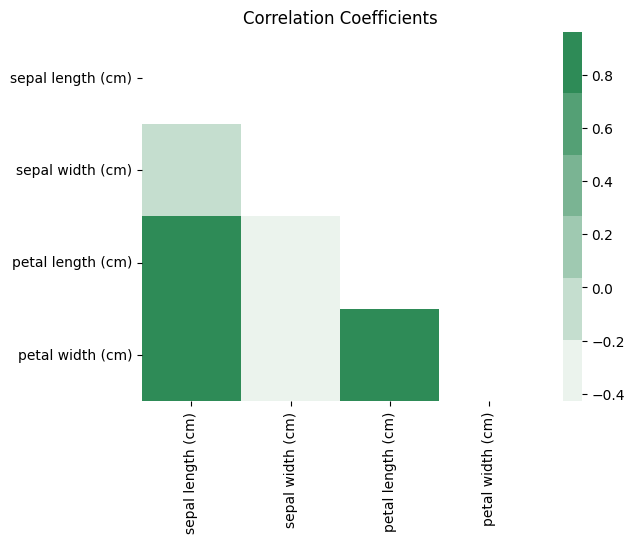

In [96]:
# Create mask for unnecessary outputs
matrix = np.triu(correl_coeff)

# Create heatmpa
axis_corr = sns.heatmap(correl_coeff, mask = matrix, cmap=sns.light_palette("seagreen"))

# Set title
plt.title('Correlation Coefficients')

plt.show();

While both plots above present the same information in a slightly different visual manner, they are both giving the same information. the seaborn plot does require less inputs to create what might be considered clearer but the matplotlib version is just as useful.  
It is considered that Matplotlib should actually be used when a complex plot is required, with each parameter able to be specified by the user, whereas seaborn is a quick solution when visual graphics are required but with less coding input.

-  https://www.newhorizons.com/resources/blog/how-to-choose-between-seaborn-vs-matplotlib#:~:text=If%20you%20need%20complete%20control,would%20be%20the%20better%20choice
-  https://techifysolutions.com/blog/seaborn-vs-matplotlib/#:~:text=Matplotlib%20is%20a%20low%2Dlevel,less%20coding%20compared%20to%20matplotli



# Task 9: Linear Regression

Returning to the scatter plot in task 5, where sepal length and width are plotted, the R-squared value can be easily determined to give an indication of how much the 2 variables explain the variance.  
Source:  
https://akashdeepmahata.medium.com/understanding-the-significance-of-r-squared-0eb336ca89de#:~:text=For%20example%2C%20a%20model%20with,good%20fit%20to%20the%20data  
https://en.wikipedia.org/wiki/Coefficient_of_determination  

To calculate R-squared, scipy is used, but first to fit a regression line.

In [97]:
# Using scipy to fit a regression line
fit = sp.stats.linregress(x, y)

# Show results
fit

LinregressResult(slope=np.float64(-0.061884797964144145), intercept=np.float64(3.418946836103816), rvalue=np.float64(-0.11756978413300208), pvalue=np.float64(0.15189826071144782), stderr=np.float64(0.04296698792989742), intercept_stderr=np.float64(0.2535622689351081))

The output gives the same slope (m) and y-intercept (c) as the method used in task 6 however, with the above code, the rvalue is also calculated and can be seen in the results.   
The below code pulls this value and presents it.

In [98]:
# Show R value.
fit.rvalue

np.float64(-0.11756978413300208)

As the name suggests, to determine R-squared, it is simply the R-value squared (to the power of 2)

In [99]:
# R² value.
rval = fit.rvalue**2

# Show
rval

np.float64(0.013822654141080708)

The resulting figure of 0.01382 means that only 1.38% of the variation in the plots are attributed to sepal length a width. This becomes evident when reviewing the plot again below.

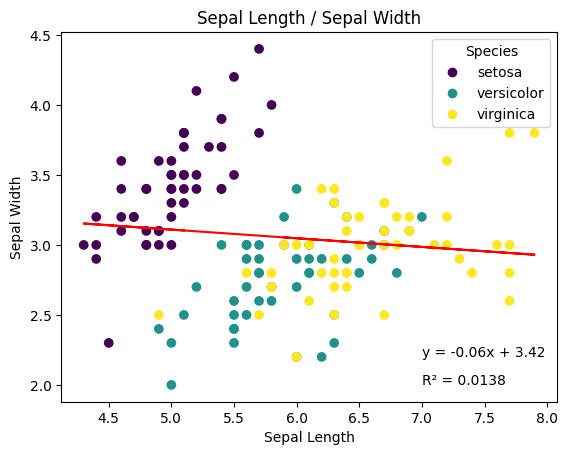

In [100]:
# Duplicate code from scatter plot creation in task 6
# Create scatter plot
fig, ax = plt.subplots()

ax.scatter(x, y, c = iris.target)

# Setting plot title and axis labels.
ax.set_title('Sepal Length / Sepal Width')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

# Legend for the scatter plot.
first_legend = ax.legend(scatter.legend_elements()[0], iris.target_names, title = 'Species')

# Using polyfit to fit a line to the data.
m, c = np.polyfit(x, y, 1)

# Adding regression line.
regline, = ax.plot(x, m * x + c, color = "red")

# Add regression line formula.
ax.text(7, 2.2, f'y = {m:.2f}x + {c:.2f}')

# Add new R² value to plot
ax.text(7, 2, f'R² = {rval:.4f}');

The R-squared value can be seen to be added as a text line to the above plot, but given there is such variation in the points around the regression line, it is clear why the R-squared value is only 0.0138.

# Task 10: Pairplot

To create a pairplot of the data set, seaborn is a useful tool. It allows multiple plots to be created with simple code, which offers the ability to visually get an initial understanding of the data set with ease.

Source:  
https://builtin.com/articles/seaborn-pairplot

To help make the pairplot clearer, several parameters can be set:
```
hue = 'class'
```
As with above, specifying hue as 'class' ensures each species is a different colour.

```
diag_kind = 'hist'
```
This ensures the diagonal where a scatterplot would only be comparing a single target against itself, instead captures a histogram.
```
{'bins' = 20}
```
As with above, this sets the number of bins per histogram.

Paiplot source: https://seaborn.pydata.org/generated/seaborn.pairplot.html  
Bins solution: https://stackoverflow.com/questions/59696426/how-to-change-the-number-of-bins-in-seaborns-pairplot-function

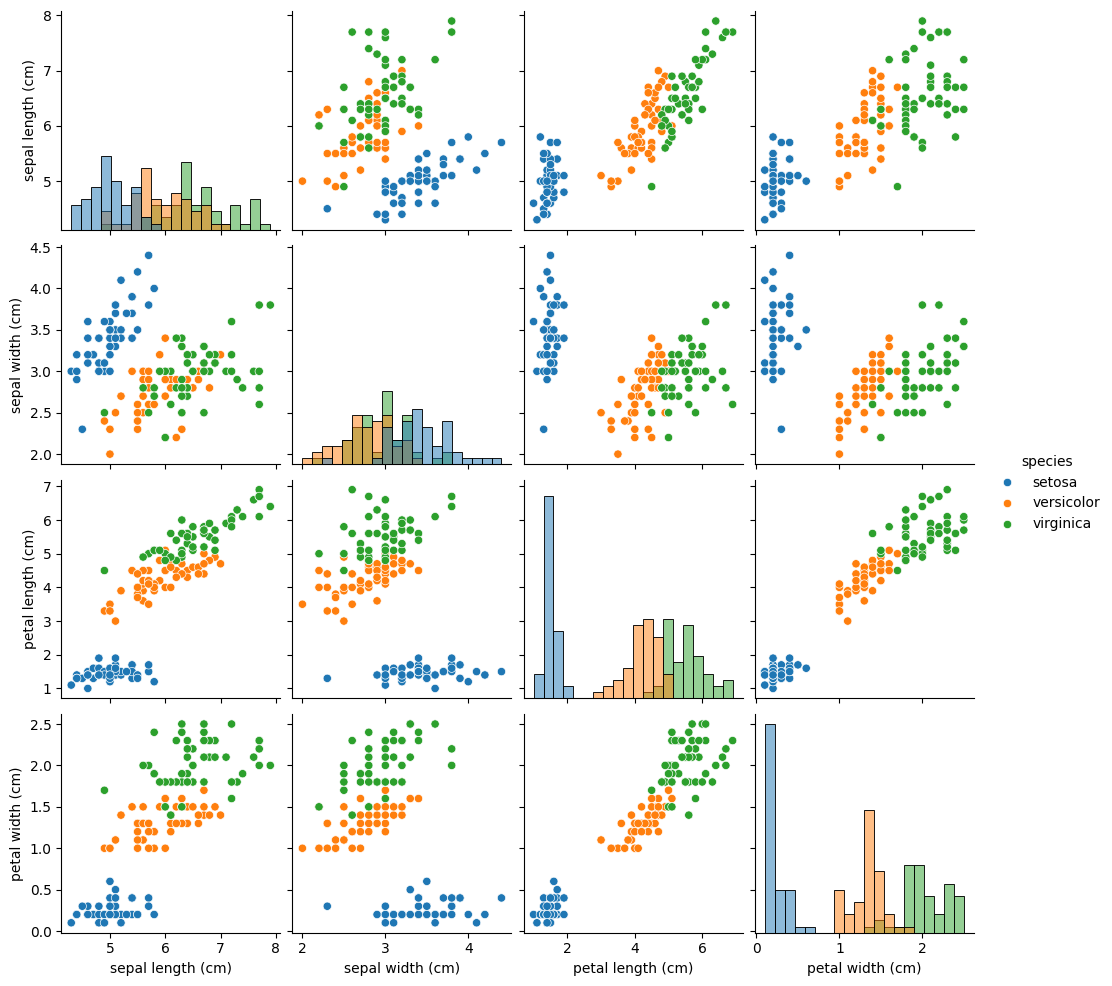

In [101]:
# Create pairplot, colour coding for species, and applying histograms on the diagonal.
sns.pairplot(iris_df, hue = 'species', diag_kind = 'hist', diag_kws = {'bins' : 20})

# Show pairplot
plt.show;

The above pairplot, while visually appealing, actually presents a lot of data to the viewer. It not only is a very quick means to create scatter plots for each pair of features, without the need to do each one individually, it helps determine patterns between species.  
Firstly however, to help further clean the presentation, it can be seen that the individual plots are mirrored accross the diagonal. In the bottom left plot it shows sepal length against petal width, whereas in the top right corner it plots petal width against sepal length. THe results are the same, with the plots mirror images of one another. For this reason, one option as part of the seaborn code is to make it a corner plot, thus eliminating the duplicates. See below.

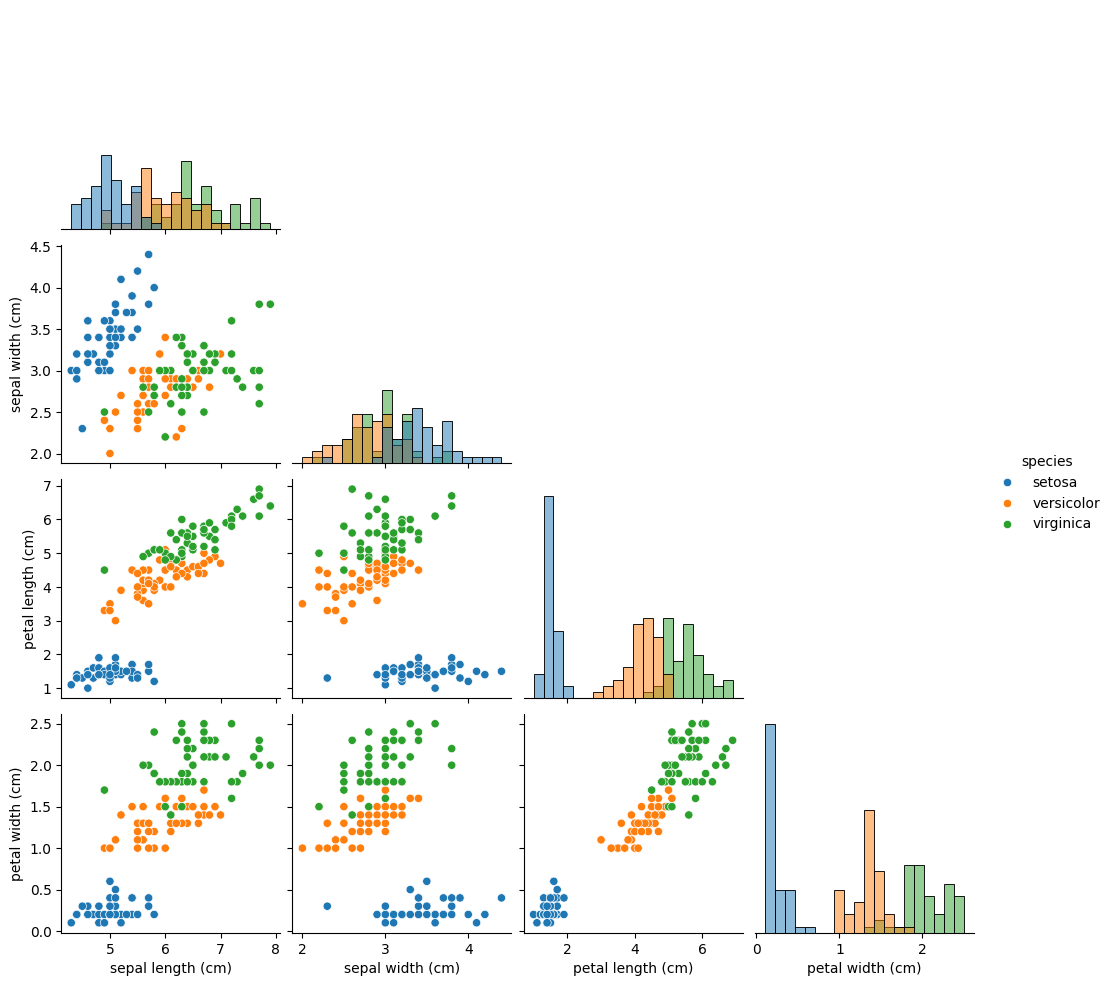

In [102]:
# Create pairplot, colour coding for species, and applying histograms on the diagonal, and making it a 'corner' plot.
sns.pairplot(iris_df, hue = 'species', diag_kind = 'hist', diag_kws = {'bins' : 20}, corner = True)

# Show pairplot
plt.show;

The effectiveness of the above plot is very telling in the level of information that can be gathered from viewing it. As documented in task 9, there is very minimal relaionship between the sepal length and sepal width however, were the R-squared value to be determined for petal length against petal width, it's clear to see that it would be a very high percentage.  
In addition to this, the clustering of Setosa measurements in many plots shows that it is possible to determine it is the species in question when only given one of the paramater measurements, ie. petal width of less than 0.7cm is the Setosa species. Similarly a petal length of less than 2cm, is also a Setosa.

## End